In [1]:
#Import the libraries
import warnings
import itertools
import pandas_datareader as web
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
d = pd.read_csv('events.csv')
d

,Unnamed: 0,Date,affect
0,1,20040104,1
1,2,20040104,1
2,3,20040105,1
3,4,20040105,1
4,5,20040112,1
...,...,...,...
12050,12051,20171226,1
12051,12052,20171227,1
12052,12053,20171231,1
12053,12054,20170403,1


In [3]:
d['Date'] = pd.to_datetime(d['Date'],format = ('%Y%m%d'))
d = d.set_index(['Date'])
del d['Unnamed: 0']
d

,affect
Date,
2004-01-04,1
2004-01-04,1
2004-01-05,1
2004-01-05,1
2004-01-12,1
...,...
2017-12-26,1
2017-12-27,1
2017-12-31,1


In [5]:
y = d['affect'].resample('MS').sum()
y

Date
2004-01-01    31
2004-02-01    72
2004-03-01    63
2004-04-01    72
2004-05-01    45
              ..
2017-08-01    28
2017-09-01    25
2017-10-01    18
2017-11-01    27
2017-12-01    16
Freq: MS, Name: affect, Length: 168, dtype: int64

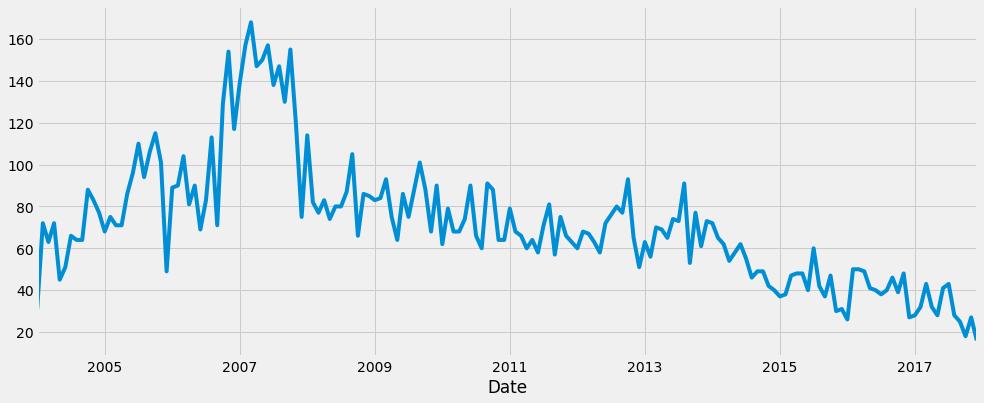

In [6]:
y.plot(figsize=(15, 6))
plt.show()

In [7]:
#Creating the training data set
p=d=q= range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1930.8659008732948
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1678.4481153050822
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1487.5871503983667
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1349.6944969760768
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1490.6308217986784
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1447.6950182780715
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1360.2451400374962
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1346.8952116808705
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1743.776226383391
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1548.2510499229354
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1420.1563719001197
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1277.3166931594897
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1429.4293111769125
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1367.982385730536
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1299.3149603178592
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1279.2866864778102
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1401.183968995939
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1304.518050469

In [9]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1,1,1),
                               seasonal_order =(1,1,1,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1728      0.120     -1.434      0.152      -0.409       0.063
ma.L1         -0.4008      0.121     -3.304      0.001      -0.639      -0.163
ar.S.L12      -0.0005      0.078     -0.007      0.995      -0.153       0.152
ma.S.L12      -1.0162      1.020     -0.996      0.319      -3.016       0.984
sigma2       183.5605    195.211      0.940      0.347    -199.046     566.167


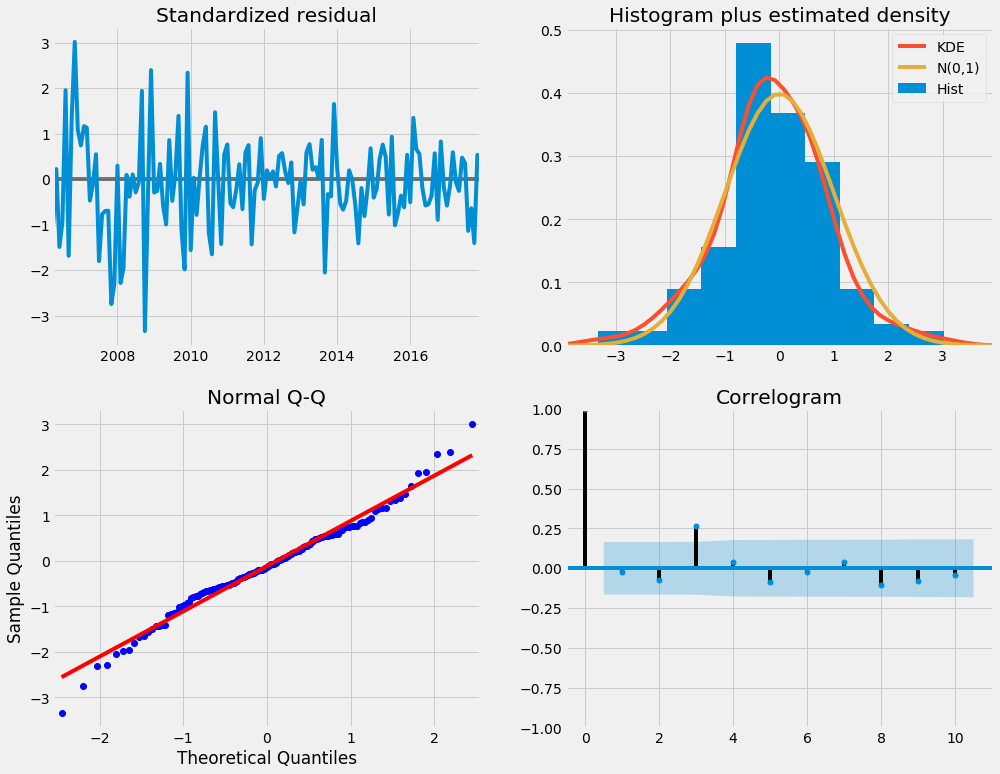

In [10]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'),dynamic=False)
pred_ci = pred.conf_int()

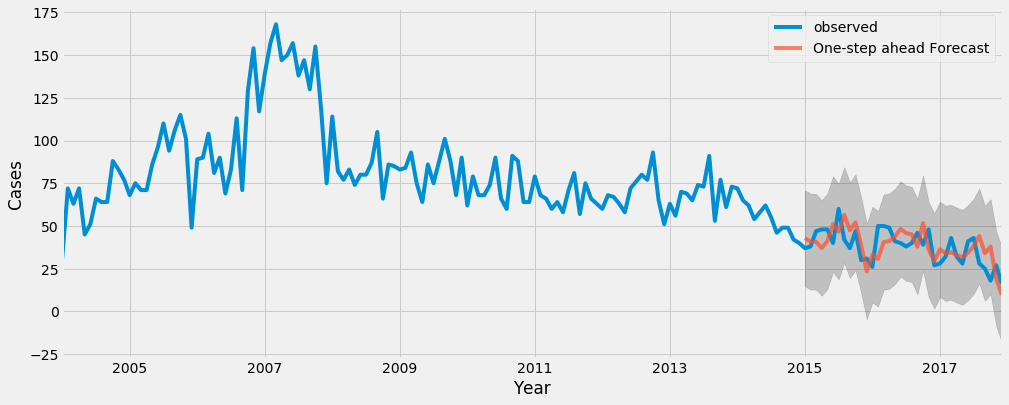

In [12]:
plt.figure(figsize=(15, 6))
ax = y['2004':].plot(label='observed')
pred.predicted_mean.plot(ax = ax,label='One-step ahead Forecast',alpha=.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],color='k',alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('Cases')

plt.legend()
plt.show()

In [13]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]

mse = ((y_forecasted - y_truth) **2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of our forecasts is 88.83


In [14]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2015-01-01'),dynamic=True, full_result=True)
pred_dynamic_ci = pred_dynamic.conf_int()


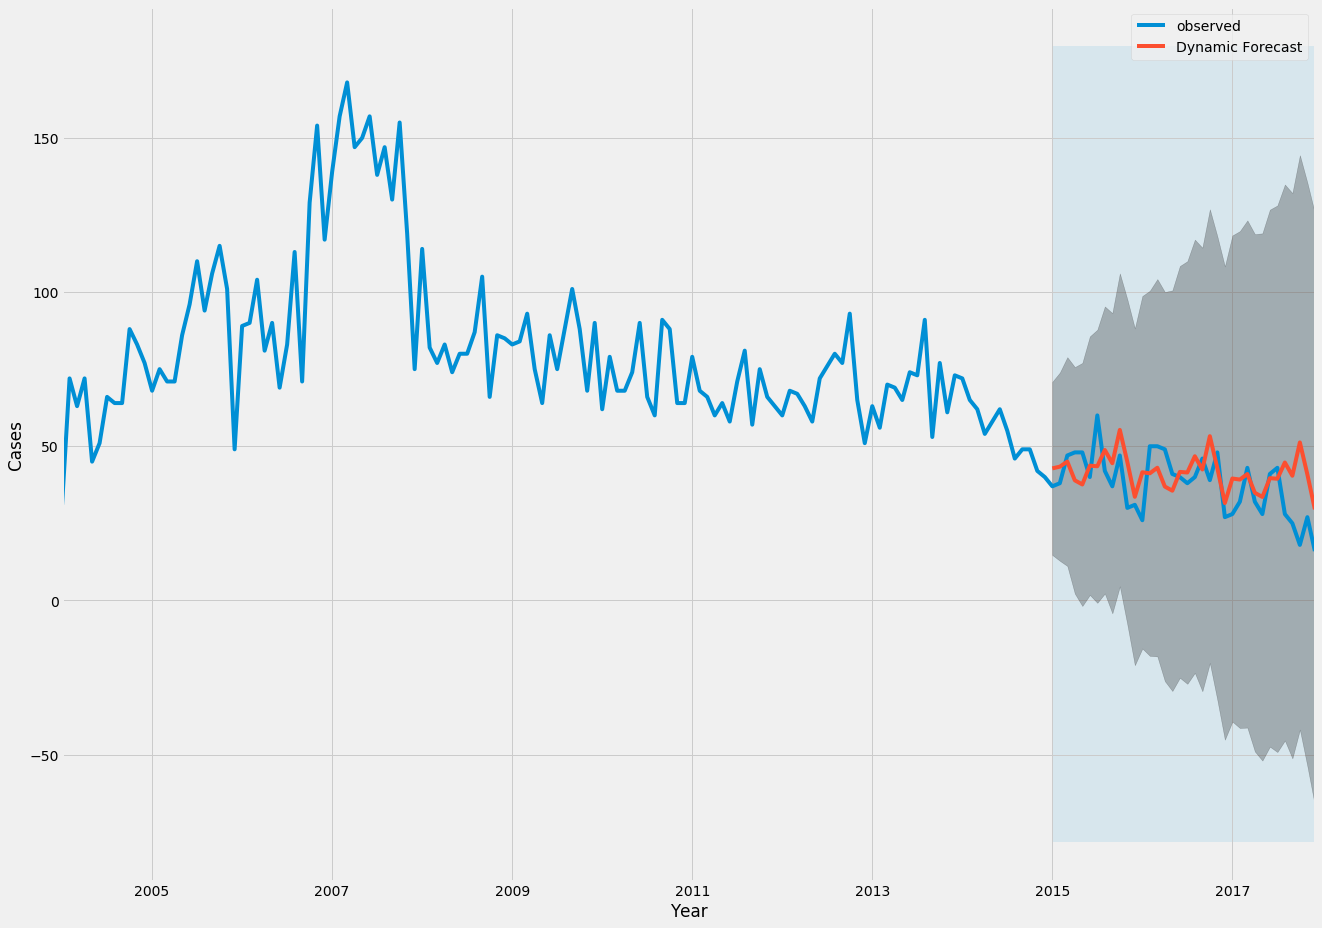

In [15]:
plt.figure(figsize=(15,6))
ax = y['2004':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Year')
ax.set_ylabel('Cases')
plt.legend()
plt.show()

In [16]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2015-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 112.49


In [17]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


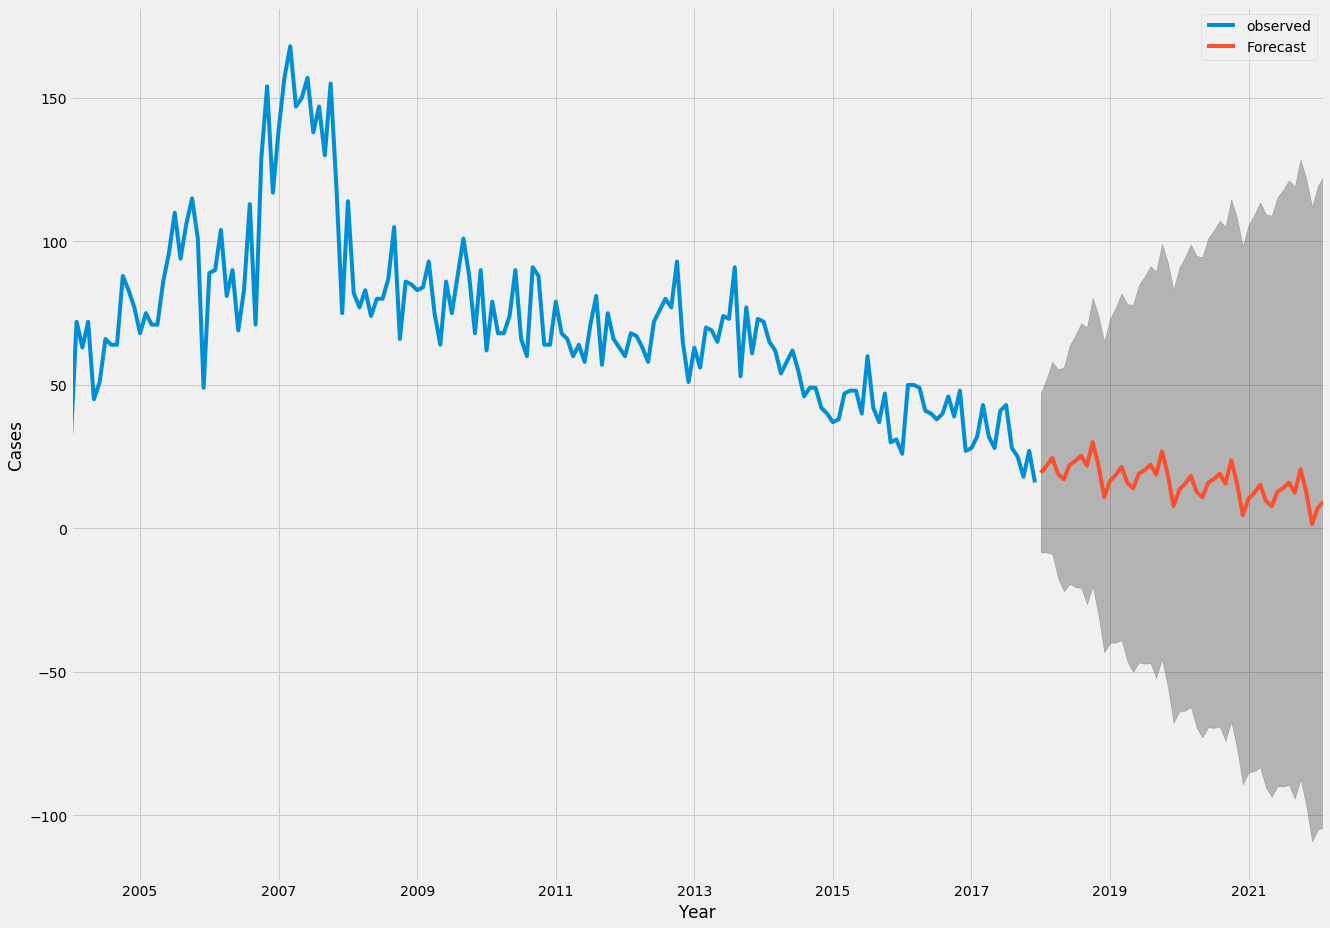

In [18]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Cases')

plt.legend()
plt.show()
